In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

Load data from files

In [2]:
inferno = pd.read_csv("data/train-grenades-de_inferno.csv")
mirage = pd.read_csv("data/train-grenades-de_mirage.csv")
inferno

,Unnamed: 0,demo_id,demo_round_id,round_start_tick,weapon_fire_id,team,detonation_raw_x,detonation_raw_y,detonation_raw_z,throw_from_raw_x,throw_from_raw_y,throw_from_raw_z,throw_tick,detonation_tick,LABEL,TYPE,map_name
0,0,5158,46311,159689,6573932,CT,448.4950,3380.300,222.4680,864.899658,2389.010254,144.062393,13344,13566.0,True,flashbang,de_inferno
1,1,5595,55563,397002,7899867,T,778.6860,2274.620,137.7930,455.041687,3182.332275,160.031250,11044,11352.0,True,smoke,de_inferno
2,2,5596,55589,305379,7903151,T,1447.9700,896.635,144.4740,-279.968750,-268.968750,29.181963,3193,3871.0,True,smoke,de_inferno
3,3,5596,55595,397002,7904064,T,2717.1800,318.481,552.7410,1880.825562,571.397339,222.031250,10406,10628.0,True,flashbang,de_inferno
4,4,788,42597,71501,6039404,T,313.6380,2291.220,396.4490,1166.624634,2799.950684,127.641594,2873,3095.0,True,flashbang,de_inferno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,349,596,42744,45262,6063867,T,2479.9600,-107.194,86.0312,1431.441772,130.297836,127.680000,10722,10952.0,True,molotov,de_inferno
350,350,5596,55582,187969,7902073,T,490.8890,3166.080,162.0310,110.810173,1569.611816,132.013687,11141,11843.0,True,smoke,de_inferno
351,351,5452,51765,93628,7371564,T,982.5730,2677.020,129.9930,611.807983,1969.810059,130.363892,8960,9196.0,True,smoke,de_inferno
352,352,645,42494,370398,6024136,T,-13.2019,1426.310,102.8550,1263.402222,2981.905029,135.901749,7269,8025.0,False,smoke,de_inferno


In [3]:
grenades = pd.concat([inferno, mirage], ignore_index = True)
grenades = grenades.loc[:, ['team','detonation_raw_x','detonation_raw_y', 'detonation_raw_z','throw_from_raw_x', 'throw_from_raw_y', 'throw_from_raw_z', 'throw_tick', 'detonation_tick', 'LABEL', 'TYPE', 'map_name']]
grenades

,team,detonation_raw_x,detonation_raw_y,detonation_raw_z,throw_from_raw_x,throw_from_raw_y,throw_from_raw_z,throw_tick,detonation_tick,LABEL,TYPE,map_name
0,CT,448.495,3380.300,222.4680,864.899658,2389.010254,144.062393,13344,13566.0,True,flashbang,de_inferno
1,T,778.686,2274.620,137.7930,455.041687,3182.332275,160.031250,11044,11352.0,True,smoke,de_inferno
2,T,1447.970,896.635,144.4740,-279.968750,-268.968750,29.181963,3193,3871.0,True,smoke,de_inferno
3,T,2717.180,318.481,552.7410,1880.825562,571.397339,222.031250,10406,10628.0,True,flashbang,de_inferno
4,T,313.638,2291.220,396.4490,1166.624634,2799.950684,127.641594,2873,3095.0,True,flashbang,de_inferno
...,...,...,...,...,...,...,...,...,...,...,...,...
719,T,-1462.400,728.349,-45.9688,-1959.668213,704.495361,-47.968750,14328,14564.0,True,smoke,de_mirage
720,CT,-756.819,-2198.980,-159.1930,-593.158081,-1179.779297,-167.968750,9318,9540.0,False,flashbang,de_mirage
721,CT,-696.054,-1541.940,59.4860,-918.049866,-2595.171631,-167.968750,11433,11657.0,True,flashbang,de_mirage
722,CT,529.241,-1621.910,-262.0000,5.098903,-1576.270996,-170.078476,3034,3342.0,True,smoke,de_mirage


In [4]:
grenades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   team              724 non-null    object 
 1   detonation_raw_x  724 non-null    float64
 2   detonation_raw_y  724 non-null    float64
 3   detonation_raw_z  724 non-null    float64
 4   throw_from_raw_x  724 non-null    float64
 5   throw_from_raw_y  724 non-null    float64
 6   throw_from_raw_z  724 non-null    float64
 7   throw_tick        724 non-null    int64  
 8   detonation_tick   724 non-null    float64
 9   LABEL             724 non-null    bool   
 10  TYPE              724 non-null    object 
 11  map_name          724 non-null    object 
dtypes: bool(1), float64(7), int64(1), object(3)
memory usage: 63.1+ KB


In [5]:
grenades.describe()

,detonation_raw_x,detonation_raw_y,detonation_raw_z,throw_from_raw_x,throw_from_raw_y,throw_from_raw_z,throw_tick,detonation_tick
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,157.551721,180.640215,71.953754,297.086266,172.226112,-26.001280,6714.269337,7051.835635
std,1105.911713,1480.500883,219.299893,1055.338583,1395.506050,154.686508,3947.466559,3941.110552
min,-2389.260000,-2782.130000,-365.589000,-2551.528809,-2595.171631,-367.968750,1574.000000,1910.000000
25%,-678.260750,-922.384000,-165.433500,-441.834808,-776.138321,-167.968750,3418.250000,3677.500000
50%,195.235500,101.580000,114.421000,329.095703,138.886826,-45.968750,5768.000000,6052.000000
75%,985.894000,1120.520000,162.031000,1153.801910,952.328186,129.890339,9179.000000,9456.500000
max,2717.180000,3413.390000,868.790000,2634.000732,3566.003174,292.031250,24566.000000,24788.000000


In [6]:
grenades['throw_dist'] = np.sqrt((grenades['throw_from_raw_x'] - grenades['detonation_raw_x'])**2 + 
                                   (grenades['throw_from_raw_y'] - grenades['detonation_raw_y'])**2 +
                                   (grenades['throw_from_raw_z'] - grenades['detonation_raw_z'])**2)
grenades['throw_to_detonation_ticks'] = grenades['detonation_tick'] - grenades['throw_tick']
grenades_cut = grenades[['team', 'LABEL', 'TYPE','map_name','throw_tick', 'throw_dist', 'throw_to_detonation_ticks']]
grenades_cut

,team,LABEL,TYPE,map_name,throw_tick,throw_dist,throw_to_detonation_ticks
0,CT,True,flashbang,de_inferno,13344,1078.051779,222.0
1,T,True,smoke,de_inferno,11044,963.940743,308.0
2,T,True,smoke,de_inferno,3193,2087.509684,678.0
3,T,True,flashbang,de_inferno,10406,934.250694,222.0
4,T,True,flashbang,de_inferno,2873,1028.907444,222.0
...,...,...,...,...,...,...,...
719,T,True,smoke,de_mirage,14328,497.844023,236.0
720,CT,False,flashbang,de_mirage,9318,1032.294524,222.0
721,CT,True,flashbang,de_mirage,11433,1100.143034,224.0
722,CT,True,smoke,de_mirage,3034,534.094957,308.0


We can observe, that almost all flashbangs have around 222-224 throw_to_detonation_ticks

In [7]:
grenades_cut.loc[grenades['TYPE'] == 'flashbang'].describe()

,throw_tick,throw_dist,throw_to_detonation_ticks
count,244.000000,244.000000,244.000000
mean,6645.065574,959.462350,225.930328
std,4159.253223,392.631911,37.710060
min,2125.000000,135.560262,220.000000
25%,3186.500000,686.816151,222.000000
50%,5430.000000,958.268076,224.000000
75%,9101.250000,1190.362427,224.000000
max,24566.000000,2226.088532,812.000000


In [8]:
grenades_cut.loc[grenades['TYPE'] == 'smoke'].describe()

,throw_tick,throw_dist,throw_to_detonation_ticks
count,388.000000,388.000000,388.000000
mean,6762.384021,1073.142850,438.221649
std,3822.156580,666.537773,253.411957
min,1574.000000,22.761585,22.000000
25%,3522.000000,549.008449,236.000000
50%,5924.500000,931.136502,340.000000
75%,9215.500000,1447.962145,648.000000
max,18694.000000,2803.267093,1296.000000


In [9]:
grenades_cut.loc[grenades['TYPE'] == 'molotov'].describe()

,throw_tick,throw_dist,throw_to_detonation_ticks
count,92.000000,92.000000,92.000000
mean,6694.891304,1017.518847,209.141304
std,3931.630689,425.692343,47.339220
min,2237.000000,140.643516,70.000000
25%,3320.000000,791.821590,176.500000
50%,5456.500000,1061.340109,215.000000
75%,9297.000000,1167.940659,245.000000
max,18430.000000,3557.371518,278.000000


In [10]:
grenades_cat = grenades_cut[['team', 'LABEL', 'TYPE', 'map_name']]
grenades_num = grenades_cut[['throw_dist', 'throw_to_detonation_ticks', 'throw_tick']]

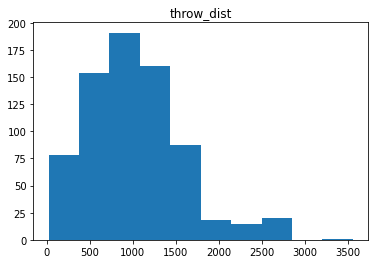

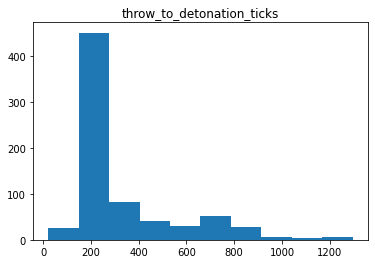

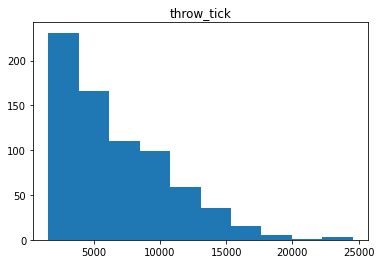

In [11]:
for i in grenades_num.columns:
    plt.hist(grenades_num[i])
    plt.title(i)
    plt.show()

The huge spike around 200 in throw_to_detonation_ticks are flashbangs, which all have around 222-224 in that column

throw_dist follows a roughly normal distribution, which means we can standardize this feature. Let us check for the outliers...

<AxesSubplot:xlabel='throw_dist'>

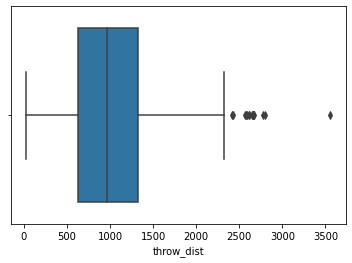

In [12]:
sns.boxplot(x=grenades_num["throw_dist"])

throw_to_detonation_ticks can be normalized only - but we can check the distributions for each type of grenade separately

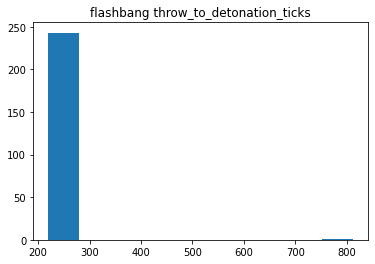

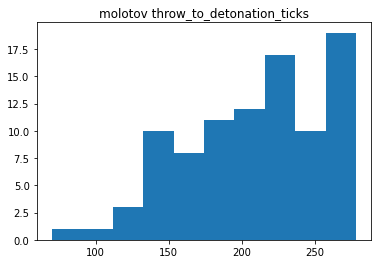

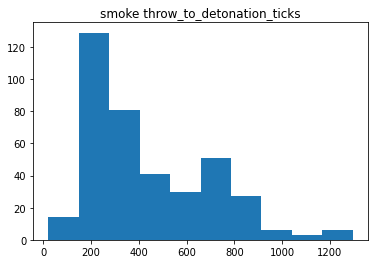

In [13]:
types = ["flashbang", "molotov", "smoke"]
for i in types:
    plt.hist(grenades_num.loc[grenades['TYPE'] == i]["throw_to_detonation_ticks"])
    plt.title(i + " throw_to_detonation_ticks")
    plt.show()
    

The distributions are not normal, so we will stick to normalization instead of standardization for throw_to_detonation_ticks feature

Below, we check the average values of throw_dist and throw_to_detonation_ticks for either of the LABEL values for all grenades

In [14]:
pd.pivot_table(grenades, index='LABEL', values=['throw_dist', 'throw_to_detonation_ticks', 'throw_tick'])

,throw_dist,throw_tick,throw_to_detonation_ticks
LABEL,,,
False,969.485891,6862.609272,331.887417
True,1043.119727,6675.178010,339.062827


Here we do it only for flashbangs

In [15]:
pd.pivot_table(grenades.loc[grenades['TYPE'] == 'flashbang'], index='LABEL',
               values=['throw_dist', 'throw_to_detonation_ticks', 'throw_tick'])

,throw_dist,throw_tick,throw_to_detonation_ticks
LABEL,,,
False,919.827368,6872.22500,223.325000
True,967.233916,6600.52451,226.441176


And here, for every grenade that is not a flashbang

In [16]:
pd.pivot_table(grenades.loc[grenades['TYPE'] != 'flashbang'], index='LABEL',
               values=['throw_dist', 'throw_to_detonation_ticks', 'throw_tick'])

,throw_dist,throw_tick,throw_to_detonation_ticks
LABEL,,,
False,987.380854,6859.144144,371.009009
True,1085.072859,6716.449864,401.325203


We can see that on average, wrongly thrown grenades travel about 5-10% less distance than these correctly thrown, and analogically for travel time, for these wrongly thrown on average it's about 8% shorter (not for flashbangs, which all have roughly constant travel time)

In [17]:
print(grenades_num.loc[grenades["TYPE"] != "flashbang"].corr())

                           throw_dist  throw_to_detonation_ticks  throw_tick
throw_dist                   1.000000                   0.754852   -0.130857
throw_to_detonation_ticks    0.754852                   1.000000   -0.087012
throw_tick                  -0.130857                  -0.087012    1.000000


Not surprisingly, throw_dist and throw_to_detonation_ticks are strongly correlated, we might want to consider throwing one of them away (most likely throw_to_detonation_ticks, as it does not follow the normal distribution)

Now let's see if the throw tick makes a difference for the correctness of grenade throw

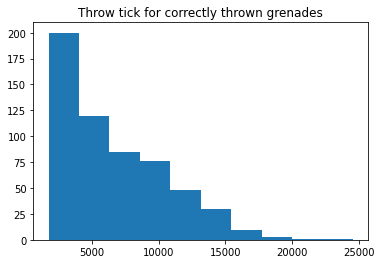

In [18]:
plt.hist(grenades_num.loc[grenades['LABEL'] == True]["throw_tick"])
plt.title("Throw tick for correctly thrown grenades")
plt.show()

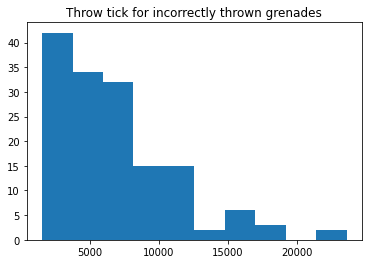

In [19]:
plt.hist(grenades_num.loc[grenades['LABEL'] == False]["throw_tick"])
plt.title("Throw tick for incorrectly thrown grenades")
plt.show()

The distributions are pretty much the same, there is no extreme outliers exclusive for any of the class (although it seems that most of the incorrectly thrown grenades are thrown rather early)

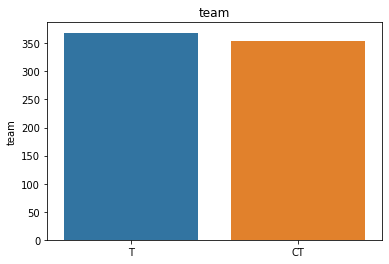

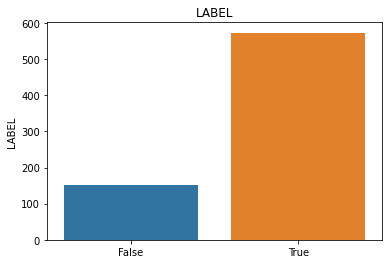

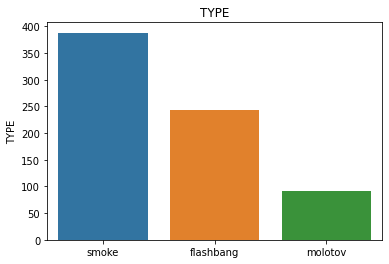

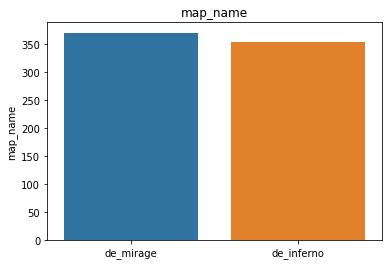

In [20]:
for i in grenades_cat.columns:
    sns.barplot(x=grenades_cat[i].value_counts().index, y=grenades_cat[i].value_counts()).set_title(i)
    plt.show()

In [21]:
grenades['LABEL'] = grenades['LABEL'].apply(lambda x: 1 if x is True else 0)

In [22]:
grenades

,team,detonation_raw_x,detonation_raw_y,detonation_raw_z,throw_from_raw_x,throw_from_raw_y,throw_from_raw_z,throw_tick,detonation_tick,LABEL,TYPE,map_name,throw_dist,throw_to_detonation_ticks
0,CT,448.495,3380.300,222.4680,864.899658,2389.010254,144.062393,13344,13566.0,1,flashbang,de_inferno,1078.051779,222.0
1,T,778.686,2274.620,137.7930,455.041687,3182.332275,160.031250,11044,11352.0,1,smoke,de_inferno,963.940743,308.0
2,T,1447.970,896.635,144.4740,-279.968750,-268.968750,29.181963,3193,3871.0,1,smoke,de_inferno,2087.509684,678.0
3,T,2717.180,318.481,552.7410,1880.825562,571.397339,222.031250,10406,10628.0,1,flashbang,de_inferno,934.250694,222.0
4,T,313.638,2291.220,396.4490,1166.624634,2799.950684,127.641594,2873,3095.0,1,flashbang,de_inferno,1028.907444,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,T,-1462.400,728.349,-45.9688,-1959.668213,704.495361,-47.968750,14328,14564.0,1,smoke,de_mirage,497.844023,236.0
720,CT,-756.819,-2198.980,-159.1930,-593.158081,-1179.779297,-167.968750,9318,9540.0,0,flashbang,de_mirage,1032.294524,222.0
721,CT,-696.054,-1541.940,59.4860,-918.049866,-2595.171631,-167.968750,11433,11657.0,1,flashbang,de_mirage,1100.143034,224.0
722,CT,529.241,-1621.910,-262.0000,5.098903,-1576.270996,-170.078476,3034,3342.0,1,smoke,de_mirage,534.094957,308.0


In [23]:
dummies = pd.get_dummies(grenades[['team', 'TYPE', 'map_name']])
dummies

,team_CT,team_T,TYPE_flashbang,TYPE_molotov,TYPE_smoke,map_name_de_inferno,map_name_de_mirage
0,1,0,1,0,0,1,0
1,0,1,0,0,1,1,0
2,0,1,0,0,1,1,0
3,0,1,1,0,0,1,0
4,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...
719,0,1,0,0,1,0,1
720,1,0,1,0,0,0,1
721,1,0,1,0,0,0,1
722,1,0,0,0,1,0,1


Create X (non-scaled), drop throw_to_detonation_ticks due to strong correlation with throw_dist

In [24]:
X = dummies.join(grenades_num)
X.drop("throw_to_detonation_ticks", axis=1, inplace=True)
X

,team_CT,team_T,TYPE_flashbang,TYPE_molotov,TYPE_smoke,map_name_de_inferno,map_name_de_mirage,throw_dist,throw_tick
0,1,0,1,0,0,1,0,1078.051779,13344
1,0,1,0,0,1,1,0,963.940743,11044
2,0,1,0,0,1,1,0,2087.509684,3193
3,0,1,1,0,0,1,0,934.250694,10406
4,0,1,1,0,0,1,0,1028.907444,2873
...,...,...,...,...,...,...,...,...,...
719,0,1,0,0,1,0,1,497.844023,14328
720,1,0,1,0,0,0,1,1032.294524,9318
721,1,0,1,0,0,0,1,1100.143034,11433
722,1,0,0,0,1,0,1,534.094957,3034


Create Y

In [25]:
Y = grenades["LABEL"]
Y

0      1
1      1
2      1
3      1
4      1
      ..
719    1
720    0
721    1
722    1
723    1
Name: LABEL, Length: 724, dtype: int64

Seeing if something closer to a normal distribution can be achieved

<AxesSubplot:>

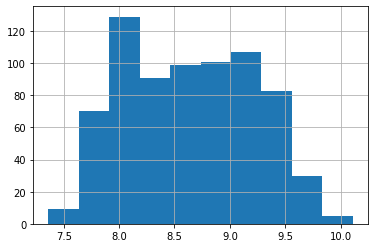

In [26]:
X["throw_tick_norm"] = np.log(X["throw_tick"] + 1)
X["throw_tick_norm"].hist()

In [27]:
X.drop("throw_tick",1,inplace=True)
X

,team_CT,team_T,TYPE_flashbang,TYPE_molotov,TYPE_smoke,map_name_de_inferno,map_name_de_mirage,throw_dist,throw_tick_norm
0,1,0,1,0,0,1,0,1078.051779,9.498897
1,0,1,0,0,1,1,0,963.940743,9.309733
2,0,1,0,0,1,1,0,2087.509684,8.069029
3,0,1,1,0,0,1,0,934.250694,9.250234
4,0,1,1,0,0,1,0,1028.907444,7.963460
...,...,...,...,...,...,...,...,...,...
719,0,1,0,0,1,0,1,497.844023,9.570041
720,1,0,1,0,0,0,1,1032.294524,9.139811
721,1,0,1,0,0,0,1,1100.143034,9.344347
722,1,0,0,0,1,0,1,534.094957,8.017967


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[["throw_dist", "throw_tick_norm"]] = scaler.fit_transform(X_scaled[["throw_dist", "throw_tick_norm"]])
X_scaled

,team_CT,team_T,TYPE_flashbang,TYPE_molotov,TYPE_smoke,map_name_de_inferno,map_name_de_mirage,throw_dist,throw_tick_norm
0,1,0,1,0,0,1,0,0.089648,1.472557
1,0,1,0,0,1,1,0,-0.113771,1.145835
2,0,1,0,0,1,1,0,1.889142,-0.997096
3,0,1,1,0,0,1,0,-0.166697,1.043068
4,0,1,1,0,0,1,0,0.002041,-1.179434
...,...,...,...,...,...,...,...,...,...
719,0,1,0,0,1,0,1,-0.944650,1.595435
720,1,0,1,0,0,0,1,0.008079,0.852346
721,1,0,1,0,0,0,1,0.129028,1.205619
722,1,0,0,0,1,0,1,-0.880028,-1.085291


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
cv = cross_val_score(gnb,X_scaled,Y,cv=5)
print(cv)
print(cv.mean())

[0.71034483 0.76551724 0.73103448 0.72413793 0.74305556]
0.7348180076628352


In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_scaled,Y,cv=5)
print(cv)
print(cv.mean())

[0.79310345 0.79310345 0.79310345 0.7862069  0.79166667]
0.7914367816091954


In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X,Y,cv=5)
print(cv)
print(cv.mean())

[0.79310345 0.79310345 0.79310345 0.7862069  0.79166667]
0.7914367816091954


In [32]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X,Y,cv=5)
print(cv)
print(cv.mean())

[0.64827586 0.64137931 0.66206897 0.65517241 0.72916667]
0.6672126436781609


In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X,Y,cv=5)
print(cv)
print(cv.mean())

[0.74482759 0.75172414 0.77931034 0.74482759 0.77083333]
0.7583045977011496


In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X,Y,cv=5)
print(cv)
print(cv.mean())

[0.69655172 0.72413793 0.71724138 0.75172414 0.77083333]
0.7320977011494253


In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_scaled,Y,cv=5)
print(cv)
print(cv.mean())

[0.69655172 0.72413793 0.71724138 0.75172414 0.77083333]
0.7320977011494253


In [36]:
from sklearn.svm import SVC
svc = SVC(probability = True)
cv = cross_val_score(svc,X_scaled,Y,cv=5)
print(cv)
print(cv.mean())

[0.79310345 0.79310345 0.79310345 0.7862069  0.79166667]
0.7914367816091954


In [37]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc)], voting = 'soft') 

In [38]:
cv = cross_val_score(voting_clf,X_scaled,Y,cv=5)
print(cv)
print(cv.mean())

[0.79310345 0.79310345 0.7862069  0.8        0.79861111]
0.7942049808429119


In [39]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [40]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [41]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_scaled,Y)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.7914367816091954
Best Parameters: {'C': 0.0001, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [42]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_scaled,Y)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.7872892720306514
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


In [43]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_scaled,Y)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score: 0.8011111111111111
Best Parameters: {'C': 1, 'degree': 3, 'kernel': 'poly'}


In [45]:
grenades_num_pre = grenades_cut[['throw_dist', 'throw_to_detonation_ticks', 'throw_tick']]
X_pre = dummies.join(grenades_num_pre)
X_pre

,team_CT,team_T,TYPE_flashbang,TYPE_molotov,TYPE_smoke,map_name_de_inferno,map_name_de_mirage,throw_dist,throw_to_detonation_ticks,throw_tick
0,1,0,1,0,0,1,0,1078.051779,222.0,13344
1,0,1,0,0,1,1,0,963.940743,308.0,11044
2,0,1,0,0,1,1,0,2087.509684,678.0,3193
3,0,1,1,0,0,1,0,934.250694,222.0,10406
4,0,1,1,0,0,1,0,1028.907444,222.0,2873
...,...,...,...,...,...,...,...,...,...,...
719,0,1,0,0,1,0,1,497.844023,236.0,14328
720,1,0,1,0,0,0,1,1032.294524,222.0,9318
721,1,0,1,0,0,0,1,1100.143034,224.0,11433
722,1,0,0,0,1,0,1,534.094957,308.0,3034


In [49]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_pre,Y)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.7914367816091954
Best Parameters: {'C': 0.0001, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [47]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_pre,Y)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.7624425287356322
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


In [48]:
from sklearn.svm import SVC
svc = SVC(probability = True)
cv = cross_val_score(svc,X_pre,Y,cv=5)
print(cv)
print(cv.mean())

[0.79310345 0.79310345 0.79310345 0.7862069  0.77777778]
0.7886590038314176


In [33]:
X_scaled

,team_CT,team_T,TYPE_flashbang,TYPE_molotov,TYPE_smoke,map_name_de_inferno,map_name_de_mirage,throw_dist,throw_tick_norm
0,1,0,1,0,0,1,0,0.089648,1.472557
1,0,1,0,0,1,1,0,-0.113771,1.145835
2,0,1,0,0,1,1,0,1.889142,-0.997096
3,0,1,1,0,0,1,0,-0.166697,1.043068
4,0,1,1,0,0,1,0,0.002041,-1.179434
...,...,...,...,...,...,...,...,...,...
719,0,1,0,0,1,0,1,-0.944650,1.595435
720,1,0,1,0,0,0,1,0.008079,0.852346
721,1,0,1,0,0,0,1,0.129028,1.205619
722,1,0,0,0,1,0,1,-0.880028,-1.085291


In [64]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_scaled,Y)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.7914367816091954
Best Parameters: {'C': 0.0001, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [34]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_scaled,Y,cv=5)
print(cv)
print(cv.mean())

NameError: name 'SVC' is not defined

In [66]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_scaled,Y,cv=5)
print(cv)
print(cv.mean())

[0.71034483 0.76551724 0.73103448 0.71724138 0.73611111]
0.7320498084291188


In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_scaled,Y,cv=5)
print(cv)
print(cv.mean())

[0.6        0.73793103 0.71724138 0.66896552 0.72916667]
0.6906609195402299


In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
def create_baseline():
	
	model = Sequential()
	model.add(Dense(27, input_dim=9, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [36]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=20, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_scaled, Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 79.56% (0.80%)


In [37]:
model = create_baseline()
model.fit(X_scaled, Y)

23/23 [==============================] - 0s 817us/step - loss: 0.7811 - accuracy: 0.3732


In [38]:
xd = X_scaled.values
xd
pog = model.predict_classes(np.expand_dims(xd,0))

C:\Users\Matik\.virtualenvs\esportslabGrenadeClassifier-3kXZWbFs\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [39]:
Y.values

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [54]:
flat_list = [item for sublist in pog[0] for item in sublist]
flat_list

[1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,


In [55]:
from sklearn.metrics import confusion_matrix
Y.tolist()
confusion_matrix(Y.tolist(), flat_list)


array([[ 61,  90],
       [247, 326]], dtype=int64)

In [43]:
Y.shape

(724,)

In [53]:
flat_list

[0,
 1,
 0,
 1,
 0,
 -1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 -1,
 0,
 0,
 1,
 1,
 0,
 0,
 -1,
 0,
 0,
 -1,
 -1,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 -1,
 0,
 0,
 1,
 0,
 1,
 1,
 -1,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 -1,
 0,
 0,
 1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 -1,
 1,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 1,
 0,
 -1,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 -1,
 0,
 -1,
 0,
 0,
 -1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 -1,
 0,
 -1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 -1,
 -1,
 1,
 0,
 1,
 0,
 -1,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 -1,
 0,
 1,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 